# RNN_3_emotion

- 전처리 진행하지 않은 ver.
- 긍정, 부정, 중립 3개의 감정 범주로 진행
   - 긍정 : 기존 행복 + 네이버 영화 리뷰 'https://github.com/e9t/nsmc'
   - 부정 : 기존 공포, 혐오, 슬픔 + 네이버 영화 리뷰 'https://github.com/e9t/nsmc'
   - 중립 : 연속적 대화 데이터셋
<br><br>
- 참고
  - 'SimpleRNN_Test_Code_CPU.ipynb'  
  - https://wikidocs.net/22894 
  - https://katie0809.github.io/2020/02/17/ai-study4/ 





> ## 1. 전처리 패키지(Khaiii) Import

In [ ]:
!git clone https://github.com/kakao/khaiii.git

fatal: destination path 'khaiii' already exists and is not an empty directory.


In [ ]:
!pip install cmake

In [ ]:
!mkdir build

mkdir: cannot create directory ‘build’: File exists


In [ ]:
!cd build && cmake /content/khaiii

-- [khaiii] fused multiply add option enabled
-- [hunter] Calculating Toolchain-SHA1
-- [hunter] Calculating Config-SHA1
-- [hunter] HUNTER_ROOT: /root/.hunter
-- [hunter] [ Hunter-ID: 70287b1 | Toolchain-ID: 02ccb06 | Config-ID: dffbc08 ]
-- [hunter] BOOST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.68.0-p1)
-- Boost version: 1.68.0
-- [hunter] CXXOPTS_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 2.1.1-pre)
-- [hunter] EIGEN_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.5)
-- [hunter] FMT_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 4.1.0)
-- [hunter] GTEST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.8.0-hunter-p11)
-- [hunter] NLOHMANN_JSON_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.0)
-- [hunter] SPDLOG_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 0.16.3-p1)
-- Configuring done
-- Generating done
-- Build files have been written t

In [ ]:
!cd /content/build/ && make all

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii


In [ ]:
!cd /content/build/ && make resource

Built target resource


In [ ]:
!cd /content/build && make install

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii
Install the project...
-- Install configuration: ""
-- Up-to-date: /usr/local/include/khaiii
-- Up-to-date: /usr/local/include/khaiii/KhaiiiApi.hpp
-- Up-to-date: /usr/local/include/khaiii/khaiii_dev.h
-- Up-to-date: /usr/local/include/khaiii/khaiii_api.h
-- Up-to-date: /usr/local/share/khaiii
-- Up-to-date: /usr/local/share/khaiii/preanal.tri
-- Up-to-date: /usr/local/share/khaiii/errpatch.len
-- Up-to-date: /usr/local/share/khaiii/errpatch.val
-- Up-to-date: /usr/local/share/khaiii/conv.3.fil
-- Up-to-date: /usr/local/share/khaiii/config.json
-- Up-to-date: /usr/local/share/khaiii/conv.4.fil
-- Up-to-date: /usr/local/share/khaiii/cnv2hdn.lin
-- Up-to-date: /usr/local/share/khaiii/embed.bin
-- Up-to-date: /usr/local/share/khaiii/errpatch.tri
-- Up-to-date: /usr/local/share/khaiii/restore.key
-- Up-to-date: /usr/local/share/khaiii/conv.2.fil
-- Up-to-date: /usr/local

In [ ]:
!cd /content/build && make package_python

Run CPack packaging tool for source...
CPack: Create package using ZIP
CPack: Install projects
CPack: - Install directory: /content/khaiii
CPack: Create package
CPack: - package: /content/build/khaiii-0.4.zip generated.
Built target package_python


In [ ]:
!pip install /content/build/package_python

Processing ./build/package_python
  Created wheel for khaiii: filename=khaiii-0.4-cp37-none-any.whl size=22882470 sha256=94c30f757e47a6e9aae4efd31342a530cc0d279254ada987a0938fc465bb12cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-35mw7zjn/wheels/6b/4d/23/84c4acc3ef5226ca75c4e3ad84c39a0654d11c3a9c1941193f
Successfully built khaiii
  Found existing installation: khaiii 0.4
    Uninstalling khaiii-0.4:
      Successfully uninstalled khaiii-0.4


In [ ]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

> ## 2. 한글 폰트 설치

- 나눔폰트 설치

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

- 설치 확인

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',

In [ ]:
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


- 적용하려면 '런타임 다시 시작' 진행

Text(0.5, 1.0, '안녕')

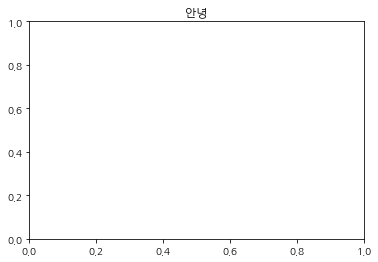

In [ ]:
plt.title('안녕')
# '안녕' 출력 확인

> ## 3. 데이터 불러오기



- dataset_emotion3.xlsx

In [ ]:
import pandas as pd

df = pd.read_excel('after_preprocessing_3emotion.xlsx', engine='openpyxl') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60857 entries, 0 to 60856
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  60857 non-null  object
 1   Emotion   60857 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 951.0+ KB


In [ ]:
df = df.loc[:,['Sentence', 'Emotion']]
df.head()

,Sentence,Emotion
0,언니 동생으로 부르는 게 맞는 일인가요..??,0
1,그냥 내 느낌일 뿐이겠지?,0
2,아직 너무 초기라서 그런 거죠?,0
3,유치원 버스 사고 낫다던데,0
4,근데 원래 이런 거 맞나요,0


In [ ]:
df.head()

,Sentence,Emotion
0,언니 동생으로 부르는 게 맞는 일인가요..??,0
1,그냥 내 느낌일 뿐이겠지?,0
2,아직 너무 초기라서 그런 거죠?,0
3,유치원 버스 사고 낫다던데,0
4,근데 원래 이런 거 맞나요,0


In [ ]:
df.tail()

,Sentence,Emotion
60852,학생은 감상문도 그렇고 표현이 굉장히 거침없네요.,1
60853,주인공이 하는 짓이 워낙 바보 같아서 이해를 못 하겠다. 였죠? 굉장히 인상적이어서...,1
60854,하지만 역시 이해가 안 가요.,1
60855,하하. 그게 솔직한 감상이라면 솔직한 감상이란 거겠죠. 성적에 욕심이 있는 타입의 ...,1
60856,안 가고 뭐 하세요?,1


In [ ]:
print('총 샘플 수 : ', len(df))

총 샘플 수 :  60857


In [ ]:
# 중복 없는 문장 확인
df.nunique()

Sentence    60533
Emotion         3
dtype: int64

In [ ]:
# 중복 문장 제거 -> 324문장 삭제 됨
df.drop_duplicates(subset = ['Sentence'], inplace = True)
len(df)

60533

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60533 entries, 0 to 60856
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  60533 non-null  object
 1   Emotion   60533 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

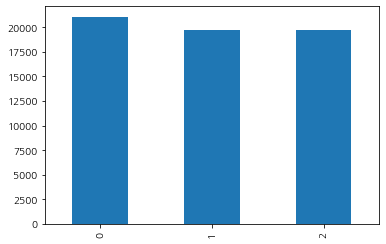

In [ ]:
df['Emotion'].value_counts().plot(kind = 'bar');

> ## 4. Train, Valid, Test Split(6 : 2 : 2)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, 
                                         test_size = 0.2,
                                         shuffle = False,
                                         random_state = 2045)

print(len(train_data))
print(len(test_data))

48426
12107


In [ ]:
train_data, valid_data = train_test_split(train_data, 
                                          test_size = 0.2,
                                          shuffle = False,
                                          random_state = 2045)

print(len(train_data))
print(len(valid_data))

38740
9686


In [ ]:
X_train = train_data['Sentence']
X_valid = valid_data['Sentence']
X_test = test_data['Sentence']
y_train = train_data['Emotion']
y_valid = valid_data['Emotion']
y_test = test_data['Emotion']

In [ ]:
print(X_train)
print(X_valid)
print(X_test)
print(y_train)
print(y_valid)
print(y_test)

0                                언니 동생으로 부르는 게 맞는 일인가요..??
1                                           그냥 내 느낌일 뿐이겠지?
2                                        아직 너무 초기라서 그런 거죠?
3                                           유치원 버스 사고 낫다던데
4                                           근데 원래 이런 거 맞나요
                               ...                        
38879                                            오글오글 재미있다
38880    원작 드라마 팬으로서 봐도 손색이 없다. 그대로 베껴서 한 거라기보다 한국판으로 리...
38881       프로젝트는 조금 무모해 보였음 ㅋ  수행 과정에서 토론하고 맞춰 과는 과정이 좋음.
38882                                          이런 잔잔함이 좋더라
38883    화려한 쇼 뒤에 숨겨진 수많은 이들의 땀과 노력 그리고 그들의 열정에 마음이 뭉클해...
Name: Sentence, Length: 38740, dtype: object
38884                                 이해한다면 조금이나마 놀랄 것이다..
38885    그래 이 영화가 높은 평점을 받을 수 없는 건 이걸 보고 불쾌감을 느낀 위선자들 때...
38886                                        재밌다.. 웃기기도 하고
38887                                                   대작
38888                        나에겐 코미디였다 ㅋㅋㅋ 그냥 신선하니 재밌었다 ㅋㅋ
           

In [ ]:
print(type(X_train))

<class 'pandas.core.series.Series'>


> ## 5. 카이 토큰화(형태소 분석) & 정수 인코딩 수행

> ### 1) 카이 토큰화

In [ ]:
def khaiii_tokenized(s):
  result = []                         # def 밑에 있어야 문장별로 리스트가 따로 들어간다 
  for word in api.analyze(s):
    for morph in word.morphs:
      result.append(morph.lex)
  return result

In [ ]:
X_train_tokenized = X_train.apply(khaiii_tokenized)
X_valid_tokenized = X_valid.apply(khaiii_tokenized)
X_test_tokenized = X_test.apply(khaiii_tokenized)

In [ ]:
X_train_tokenized

0        [언니, 동생, 으로, 부르, 는, 것, 이, 맞, 는, 일, 이, ㄴ가요, ..,...
1                      [그냥, 나, 의, 느낌, 이, ㄹ, 뿐, 이, 겠, 지, ?]
2                      [아직, 너무, 초기, 이, 라서, 그런, 거, 이, 죠, ?]
3                                  [유치원, 버스, 사, 고, 낫, 다던데]
4                                   [근데, 원래, 이런, 거, 맞나, 요]
                               ...                        
38879                                       [오글오글, 재미있, 다]
38880    [원작, 드라마, 팬, 으로서, 보, 아도, 손색, 이, 없, 다, ., 그대로, ...
38881    [프로젝트, 는, 조금, 무모, 하, 여, 보이, 었, 음, ㅋ, 수행, 과정, 에...
38882                             [이런, 잔잔, 하, ㅁ, 이, 좋, 더라]
38883    [화려, 하, ㄴ, 쇼, 뒤, 에, 숨기, 어, 지, ㄴ, 수많, 은, 이, 들, ...
Name: Sentence, Length: 38740, dtype: object

In [ ]:
print(type(X_train_tokenized))

<class 'pandas.core.series.Series'>


- Series to List

In [ ]:
X_train_tokenized = X_train_tokenized.tolist()
X_valid_tokenized = X_valid_tokenized.tolist()
X_test_tokenized = X_test_tokenized.tolist()

In [ ]:
print(type(X_train_tokenized))

<class 'list'>


In [ ]:
X_train_tokenized

[['언니',
  '동생',
  '으로',
  '부르',
  '는',
  '것',
  '이',
  '맞',
  '는',
  '일',
  '이',
  'ㄴ가요',
  '..',
  '?',
  '?'],
 ['그냥', '나', '의', '느낌', '이', 'ㄹ', '뿐', '이', '겠', '지', '?'],
 ['아직', '너무', '초기', '이', '라서', '그런', '거', '이', '죠', '?'],
 ['유치원', '버스', '사', '고', '낫', '다던데'],
 ['근데', '원래', '이런', '거', '맞나', '요'],
 ['남자', '친구', '가', '떠나', 'ㄹ까', '보', '아요'],
 ['이거', '하', '였', '는데', '허리', '가', '아프', 'ㄹ', '수', '도', '있', '나요', '?'],
 ['내', '가', '불안', '하', '여서', '꾸', '는', '것', '이', 'ㄹ까', '..'],
 ['일주일', '도', '안', '남', '았', '다', '...', 'ᅲ', 'ᅲ'],
 ['약',
  '은',
  '최대한',
  '안',
  '먹',
  '으려고',
  '하',
  '는',
  '데',
  '좋',
  '은',
  '음',
  '시',
  '있',
  '나요',
  '?'],
 ['구',
  '직',
  '활동',
  '하',
  '면서',
  '남',
  '는',
  '시간',
  '은',
  '무엇',
  '으로',
  '활용',
  '하',
  '여야',
  '되',
  '지',
  '..'],
 ['괜찮', '은', '분', '같', '아서', '괜히', '조급', '하', '여', '지', '네', '요', 'ㅜ'],
 ['제',
  '가',
  '스타일',
  '을',
  '바꾸',
  '면',
  '더',
  '어색',
  '하',
  '게',
  '만',
  '변하',
  'ㄹ',
  '것',
  '같',
  '아서',
  'ㅠ'],
 ['아내',
  '있',
  '으면

> ### 2) 정수인코딩

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_tokenized) 
X_train = tokenizer.texts_to_sequences(X_train_tokenized) # 단어를 숫자값, 인덱스로 변환하여 저장
X_valid = tokenizer.texts_to_sequences(X_valid_tokenized)
X_test = tokenizer.texts_to_sequences(X_test_tokenized)

In [ ]:
print(X_train[:5])
print(X_valid[:5])
print(X_test[:5])

[[550, 833, 53, 580, 4, 20, 1, 182, 4, 76, 1, 200, 28, 9, 9], [117, 21, 26, 394, 1, 15, 349, 1, 43, 16, 9], [187, 52, 2699, 1, 504, 197, 29, 1, 133, 9], [2314, 1767, 196, 6, 438, 3046], [158, 599, 126, 29, 1458, 73]]
[[442, 2, 643, 430, 4114, 1123, 15, 20, 1, 8, 28], [454, 1, 55, 7, 724, 12, 436, 17, 101, 17, 65, 42, 4, 20, 5, 165, 15, 19, 6, 15038, 17, 300, 5, 15998, 18, 207, 1, 43, 16, 67, 436, 1, 373, 18, 15998, 18, 23], [148, 8, 3, 3, 401, 2516, 10, 2, 6], [3734], [21, 176, 5, 1282, 1, 22, 8, 69, 69, 69, 117, 1394, 2, 92, 180, 22, 8, 87]]
[[77, 33, 14, 471, 2, 505, 3], [46, 23, 3], [310, 11, 5, 70, 1, 111, 50, 2, 31, 27, 14, 9], [67, 63, 149, 12, 205, 22, 22654, 3], [1349, 44, 152, 808, 91, 1596, 14, 38, 14, 3]]


In [ ]:
print(len(X_train))
print(len(X_valid))
print(len(X_test))

38740
9686
12107


- 어떤 단어에 어떤 정수가 부여 되었는지 확인
   - 빈도가 높을 수록 낮은 정수 부여
      - 1 ~ 33506번까지 존재

In [ ]:
word_to_index = tokenizer.word_index
len(word_to_index)

24836

In [ ]:
print(word_to_index)

{'이': 1, '하': 2, '.': 3, '는': 4, 'ㄴ': 5, '고': 6, '가': 7, '다': 8, '?': 9, '도': 10, '에': 11, '은': 12, '!': 13, '어': 14, 'ㄹ': 15, '지': 16, '을': 17, '들': 18, '보': 19, '것': 20, '나': 21, '었': 22, '아': 23, '있': 24, '게': 25, '의': 26, '되': 27, '..': 28, '거': 29, '...': 30, '면': 31, '네': 32, '았': 33, '안': 34, '를': 35, '는데': 36, '어요': 37, '주': 38, 'ㅠ': 39, '시': 40, '여': 41, '없': 42, '겠': 43, '만': 44, 'ㅂ니다': 45, '좋': 46, '아니': 47, '기': 48, '였': 49, '말': 50, '같': 51, '너무': 52, '으로': 53, '로': 54, '영화': 55, '네요': 56, '어서': 57, '에서': 58, '오': 59, '잘': 60, '저': 61, '정말': 62, '야': 63, 'ㄴ다': 64, '수': 65, '않': 66, '그': 67, '라': 68, 'ㅋ': 69, '뭐': 70, '사람': 71, 'ㄴ데': 72, '요': 73, '아서': 74, '냐': 75, '일': 76, '알': 77, '습니다': 78, '때': 79, '싶': 80, '진짜': 81, '더': 82, '한': 83, '내': 84, '적': 85, '못': 86, 'ㅋㅋ': 87, '생각': 88, '너': 89, '님': 90, '좀': 91, '니': 92, '여서': 93, '왜': 94, '아요': 95, '살': 96, '지만': 97, 'ㅁ': 98, '나오': 99, '모르': 100, '받': 101, '까지': 102, '음': 103, '어떻': 104, '으면': 105, '우리': 106, '먹': 107, '그렇'

In [ ]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('전체 단어 수: ', total_cnt + 1) # 패딩을 위한 토큰인 0번 단어 고려 +1
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt)) # 빈도수 1인 단어 수
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100) # 전체 단어 중 빈도수 1회 단어가 72.6%나 된다.
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100) 

전체 단어 수:  24837
등장 빈도가 1번 이하인 희귀 단어의 수: 13076
단어 집합(vocabulary)에서 희귀 단어의 비율: 52.649379932356254
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.3259330146945034


In [ ]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 24837


> ## 6. Padding

- Padding을 하기 위해 댓글 길이 분포를 살펴보자

댓글 최대 길이 : 132
댓글 평균 길이 : 14.511693


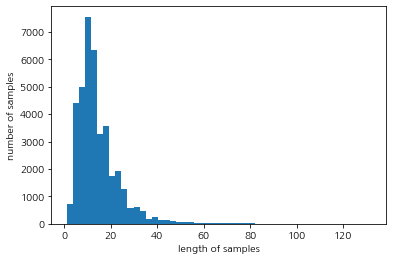

In [ ]:
print('댓글 최대 길이 : %d' %max(len(i) for i in X_train))
print('댓글 평균 길이 : %f' % (sum(map(len, X_train)) / len(X_train)))
plt.hist([len(s) for s in X_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- 45에 맞추어 Padding 진행

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 45
X_train = pad_sequences(X_train, maxlen = max_len)
X_valid = pad_sequences(X_valid, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

print('Train 데이터 크기(shape) : ', X_train.shape)
print('Valid 데이터 크기(shape) : ', X_valid.shape)
print('Test 데이터 크기(shape) : ', X_test.shape)

Train 데이터 크기(shape) :  (38740, 45)
Valid 데이터 크기(shape) :  (9686, 45)
Test 데이터 크기(shape) :  (12107, 45)


- y_data One_Hot_Encoding을 해야 한다.

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,3)
y_valid = to_categorical(y_valid,3)
y_test = to_categorical(y_test,3)

In [ ]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((38740, 45), (38740, 3), (9686, 45), (9686, 3), (12107, 45), (12107, 3))

> ## 7. 단어 임베딩 : Word2Vec 

In [ ]:
train_tokenized = X_train_tokenized + X_valid_tokenized

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = train_tokenized,
                 size = 45,
                 window = 3,
                 min_count = 1,
                 workers = 4,
                 sg = 1)  # sg=1 -> Skip-gram. CBOW보다 성능이 좋다. 

In [ ]:
model.wv.vocab

{'언니': <gensim.models.keyedvectors.Vocab at 0x7f17cfc6a5d0>,
 '동생': <gensim.models.keyedvectors.Vocab at 0x7f18058b5310>,
 '으로': <gensim.models.keyedvectors.Vocab at 0x7f17cf38ef10>,
 '부르': <gensim.models.keyedvectors.Vocab at 0x7f17cf4c40d0>,
 '는': <gensim.models.keyedvectors.Vocab at 0x7f17cfc21550>,
 '것': <gensim.models.keyedvectors.Vocab at 0x7f17cfb83d10>,
 '이': <gensim.models.keyedvectors.Vocab at 0x7f17cfb83e10>,
 '맞': <gensim.models.keyedvectors.Vocab at 0x7f17cfb83dd0>,
 '일': <gensim.models.keyedvectors.Vocab at 0x7f17cf4c4150>,
 'ㄴ가요': <gensim.models.keyedvectors.Vocab at 0x7f17cfb83ed0>,
 '..': <gensim.models.keyedvectors.Vocab at 0x7f17cfb83e50>,
 '?': <gensim.models.keyedvectors.Vocab at 0x7f17cfb83f90>,
 '그냥': <gensim.models.keyedvectors.Vocab at 0x7f17cf4d76d0>,
 '나': <gensim.models.keyedvectors.Vocab at 0x7f17cf330050>,
 '의': <gensim.models.keyedvectors.Vocab at 0x7f17cf330090>,
 '느낌': <gensim.models.keyedvectors.Vocab at 0x7f17cf3300d0>,
 'ㄹ': <gensim.models.keyedvecto

In [ ]:
model.wv.vectors.shape # (단어개수, 임베딩 차원)

(29272, 45)

In [ ]:
print(model.wv.most_similar('♡'))

[('♡♡', 0.9151361584663391), ('♥', 0.9048396944999695), ('하드', 0.8890870809555054), ('립', 0.8872297406196594), ('려요', 0.8788464665412903), ('♥♥', 0.8757101893424988), ('♥♥♥', 0.875505805015564), ('ㅠㅠㅠㅠ', 0.8731646537780762), ('ㅠㅠㅠㅠㅠ', 0.8701180219650269), ('ㅅ', 0.8664808869361877)]


In [ ]:
print(model.wv.most_similar('축하'))

[('축', 0.9242998957633972), ('생일', 0.9139744639396667), ('죄송', 0.8918024301528931), ('하드', 0.8752589821815491), ('려요', 0.85085529088974), ('박탈', 0.8462406396865845), ('감사', 0.8423004746437073), ('응원', 0.8405835628509521), ('수상', 0.8341718912124634), ('립', 0.8323060274124146)]


In [ ]:
print(model.wv.most_similar('선수'))

[('프로', 0.8715790510177612), ('어머니', 0.8613972067832947), ('팀', 0.8586803674697876), ('양', 0.8466986417770386), ('젊은이', 0.8457443714141846), ('LG', 0.8433207273483276), ('투수', 0.8352866768836975), ('작가', 0.8336454629898071), ('여러분', 0.8325114250183105), ('연기자', 0.8320546746253967)]


In [ ]:
embedding_dim = 45

embedding_matrix = np.zeros((29272, embedding_dim))  # (단어 개수, 임베딩 차원) = model.wv.vectors.shape

for word, i in word_to_index.items():
  try:
    embedding_vector = model.wv.get_vector(word)
    embedding_matrix[i] = embedding_vector
    
  except KeyError:
    continue

> ## 8. RNN Modeling

> ### 1) Define

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras import models
from keras import layers
from keras import backend as K
import tensorflow as tf

In [ ]:
# 필요할 때 쓰기
K.clear_session() 

Case_3_emotion : 'RNN_HyperParameter.ipynb' 모델 중 좋았던 조합(Case_7) -> Batch_Normalization&L2(Kernel_Regularizer) + Stacked_Layer


In [ ]:
model = Sequential(name = 'RNN_Case_3_emotion_1')
model.add(Embedding(29272, 45)) 
model.add(SimpleRNN(64,
                    kernel_regularizer = regularizers.l2(0.0001),
                    return_sequences = True))
model.add(layers.BatchNormalization())
model.add(SimpleRNN(64,
                    kernel_regularizer = regularizers.l2(0.0001)))
model.add(layers.BatchNormalization())
model.add(Dense(3, activation = 'softmax'))

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [ ]:
model.summary()

Model: "RNN_Case_3_emotion_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 45)          1317240   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 64)          7040      
_________________________________________________________________
batch_normalization (BatchNo (None, None, 64)          256       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 1,333,243
Trainable params: 1,332,987
Non-trainable params: 256
__________________________________

In [ ]:
model2 = Sequential(name = 'RNN_Case_3_emotion_2')
model2.add(Embedding(29272, 45)) 
model2.add(SimpleRNN(64))
model2.add(layers.BatchNormalization())
model2.add(Dense(3, activation = 'softmax'))

In [ ]:
model2.layers[0].set_weights([embedding_matrix])
model2.layers[0].trainable = True

In [ ]:
model2.summary()

Model: "RNN_Case_3_emotion_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 45)          1317240   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                7040      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 1,324,731
Trainable params: 1,324,603
Non-trainable params: 128
_________________________________________________________________


> ### 2) Compile 

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
                optimizer = 'RMSProp', 
                metrics = ['accuracy'])

In [ ]:
model2.compile(loss = 'categorical_crossentropy', 
                optimizer = 'RMSProp', 
                metrics = ['accuracy'])

> ### 3) EarlyStopping() & ModelCheckpoint()





In [ ]:
es = EarlyStopping(monitor = 'val_accuracy' ,
                   mode = 'max',
                   patience = 10,
                   verbose = 1)

mc = ModelCheckpoint('RNN_model_3_emotion_after_preprocessing2.h5' ,
                     monitor = 'val_accuracy' ,
                     mode = 'max' ,
                     save_best_only = True ,
                     verbose = 1)

> ### 4) Fit

- Case_3_emotion : Batch & L2 + Stacked
  - 약 7분

In [ ]:
%%time
history_3_emotion = model.fit(X_train, y_train, 
                             epochs = 50, 
                             batch_size = 120, 
                             validation_data = (X_valid, y_valid),
                             callbacks = [es, mc],
                             verbose = 1)

Epoch 1/50
323/323 [==============================] - 25s 69ms/step - loss: 0.9965 - accuracy: 0.5668 - val_loss: 1.5560 - val_accuracy: 0.3682

Epoch 00001: val_accuracy improved from -inf to 0.36816, saving model to RNN_model_3_emotion_after_preprocessing.h5
Epoch 2/50
323/323 [==============================] - 21s 66ms/step - loss: 0.7226 - accuracy: 0.7050 - val_loss: 0.8886 - val_accuracy: 0.6556

Epoch 00002: val_accuracy improved from 0.36816 to 0.65559, saving model to RNN_model_3_emotion_after_preprocessing.h5
Epoch 3/50
323/323 [==============================] - 22s 67ms/step - loss: 0.6409 - accuracy: 0.7384 - val_loss: 0.5884 - val_accuracy: 0.7641

Epoch 00003: val_accuracy improved from 0.65559 to 0.76409, saving model to RNN_model_3_emotion_after_preprocessing.h5
Epoch 4/50
323/323 [==============================] - 22s 68ms/step - loss: 0.5897 - accuracy: 0.7598 - val_loss: 0.4048 - val_accuracy: 0.8450

Epoch 00004: val_accuracy improved from 0.76409 to 0.84503, saving

- 약 4분

In [ ]:
%%time
history_3_emotion2 = model2.fit(X_train, y_train, 
                             epochs = 50, 
                             batch_size = 120, 
                             validation_data = (X_valid, y_valid),
                             callbacks = [es, mc],
                             verbose = 1)

Epoch 1/50
323/323 [==============================] - 14s 39ms/step - loss: 0.9474 - accuracy: 0.5867 - val_loss: 0.4647 - val_accuracy: 0.8071

Epoch 00001: val_accuracy improved from -inf to 0.80714, saving model to RNN_model_3_emotion_after_preprocessing2.h5
Epoch 2/50
323/323 [==============================] - 12s 38ms/step - loss: 0.6891 - accuracy: 0.7138 - val_loss: 0.6482 - val_accuracy: 0.7400

Epoch 00002: val_accuracy did not improve from 0.80714
Epoch 3/50
323/323 [==============================] - 12s 38ms/step - loss: 0.6178 - accuracy: 0.7422 - val_loss: 0.7330 - val_accuracy: 0.6988

Epoch 00003: val_accuracy did not improve from 0.80714
Epoch 4/50
323/323 [==============================] - 12s 37ms/step - loss: 0.5755 - accuracy: 0.7619 - val_loss: 0.5332 - val_accuracy: 0.7845

Epoch 00004: val_accuracy did not improve from 0.80714
Epoch 5/50
323/323 [==============================] - 12s 37ms/step - loss: 0.5456 - accuracy: 0.7784 - val_loss: 0.5758 - val_accuracy: 0

> ### 5) Visualization

- Accuaracy & Loss



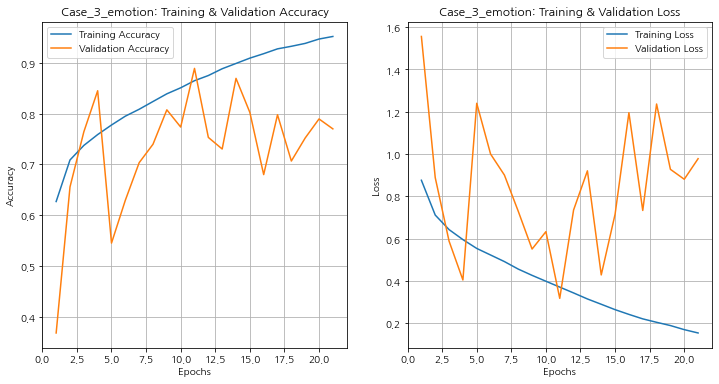

In [ ]:
epochs1 = range(1, len(history_3_emotion.history['val_accuracy']) + 1)
epochs2 = range(1, len(history_3_emotion.history['val_loss']) + 1)

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs1, history_3_emotion.history['accuracy'])
plt.plot(epochs1, history_3_emotion.history['val_accuracy'])
plt.title('Case_3_emotion: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs2, history_3_emotion.history['loss'])
plt.plot(epochs2, history_3_emotion.history['val_loss'])
plt.title('Case_3_emotion: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.show()

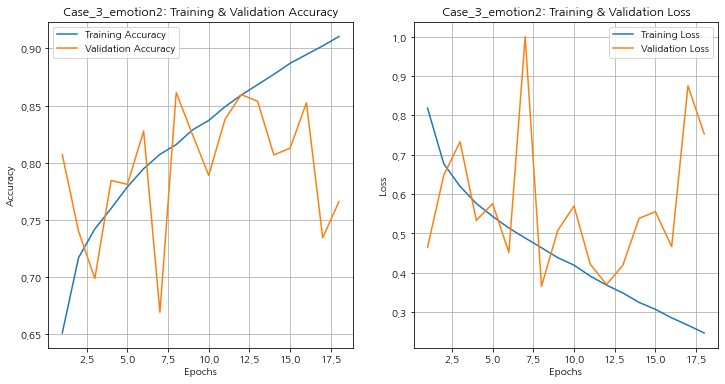

In [ ]:
epochs1 = range(1, len(history_3_emotion2.history['val_accuracy']) + 1)
epochs2 = range(1, len(history_3_emotion2.history['val_loss']) + 1)

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs1, history_3_emotion2.history['accuracy'])
plt.plot(epochs1, history_3_emotion2.history['val_accuracy'])
plt.title('Case_3_emotion2: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs2, history_3_emotion2.history['loss'])
plt.plot(epochs2, history_3_emotion2.history['val_loss'])
plt.title('Case_3_emotion2: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.show()

> ### 6) Predict

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# 0.70

379/379 [==============================] - 3s 8ms/step - loss: 2.0008 - accuracy: 0.4689
Loss = 2.00082
Accuracy = 0.46890


In [ ]:
loss, accuracy = model2.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# 0.70

379/379 [==============================] - 2s 5ms/step - loss: 1.8815 - accuracy: 0.3420
Loss = 1.88153
Accuracy = 0.34195


> ## 9. Test



In [ ]:
def sentiment_predict(sentence):
  sentence = sentence.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣A-Za-z♡!?^;%*><~]', '')
  sentence = khaiii_tokenized(sentence)
  encoded = tokenizer.texts_to_sequences([sentence])
  pad_sentence = pad_sequences(encoded, maxlen=max_len)
  result = model.predict(pad_sentence)
  print(f'긍정: {result[0][0]:.5f}')
  print(f'부정: {result[0][1]:.5f}')
  print(f'중립: {result[0][2]:.5f}')

In [ ]:
# 부정1
sentence = '아니 진짜 너무 무서운데ㅜㅜ'
sentiment_predict(sentence)

긍정: 0.99626
부정: 0.00342
중립: 0.00032


In [ ]:
# 부정2
sentence = '나 내일 시험 떨어지면 어떡하지'
sentiment_predict(sentence)

긍정: 0.97402
부정: 0.00241
중립: 0.02357


In [ ]:
# 부정3
sentence = '진짜..쓰레기 기업이네'
sentiment_predict(sentence)

긍정: 0.99972
부정: 0.00001
중립: 0.00026


In [ ]:
# 부정4 : 왜 긍정으로 분류하지? '아름다운' 때문인가
sentence = '유독 슬프게 다가오는 두 배우의 눈빛과 아름다운 영상미'
sentiment_predict(sentence)

긍정: 0.00009
부정: 0.01924
중립: 0.98067


In [ ]:
# 중립1 : 역시 긍정으로 분류한다.
sentence = '그들의 삶을 있는 그대로 보여준 영화'
sentiment_predict(sentence)

긍정: 0.00179
부정: 0.00129
중립: 0.99692


In [ ]:
# 중립2 
sentence = '내 핸드폰은 갤럭시 기종이다.'
sentiment_predict(sentence)

긍정: 0.36272
부정: 0.53746
중립: 0.09981


In [ ]:
# 중립3
sentence = '그녀는 찬성했어'
sentiment_predict(sentence)

긍정: 0.00008
부정: 0.99133
중립: 0.00859


In [ ]:
# 중립4
sentence = '너네 집 휴지통이 노란색이네?'
sentiment_predict(sentence)

긍정: 0.18130
부정: 0.54109
중립: 0.27761


In [ ]:
# 긍정1 : '너무'만 있으면 잘 분류하고, '정말'만 있으면 반만 분류하고, '정말 너무'로 하면 부정이라고 한다.
sentence = '나 기분이 정말 너무 좋아'
sentiment_predict(sentence)

긍정: 0.24447
부정: 0.00001
중립: 0.75552


In [ ]:
# 긍정2 : 중립으로 분류
sentence = '나돜ㅋㅋㅋㅋㅋㅋㅋ 유야호 하는 부분 보려고 계속 재생중임ㅋㅋㅋㅋㅋ'
sentiment_predict(sentence)

긍정: 0.01749
부정: 0.43820
중립: 0.54430


In [ ]:
# 긍정3 : 중립으로 분류
sentence = '오늘 낮에 강아지랑 같이 소파에 앉아서 햇빛 쐬는데 따뜻하고 노곤해서 좋았어ㅎㅎ'
sentiment_predict(sentence)

긍정: 0.03659
부정: 0.00070
중립: 0.96271


In [ ]:
# 긍정4 : 
sentence = '너 시험 합격했어?! 잘 됐다!'
sentiment_predict(sentence)

긍정: 0.03678
부정: 0.09728
중립: 0.86594


> ## 결론 

- 긍정(0), 부정(1), 중립(2) 세 감정으로 분류했다.
   - 처음으로 정확도가 70%까지 올랐다.
   - 12문장 중 긍정 3/4, 부정 1/4, 중립 1/4을 틀리게 분류했다. 긍정의 분류 정확도가 가장 떨어졌다.  

> ## 10. 모델 저장

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 764567
-rw------- 1 root root   4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root     34592 Mar 17 07:32 001_model_iris.h5
drwx------ 2 root root      4096 Mar 19 08:32 002_best_mnist.h6
-rw------- 1 root root  41498896 Mar 23 02:27 002_dogs_and_cats_small.h5
drwx------ 2 root root      4096 Mar 19 08:33 003_best_mnist.h7
-rw------- 1 root root  41499744 Mar 23 06:23 003_dogs_and_cats_small.h5
-rw------- 1 root root  39879700 Mar 23 04:48 003_Logo_Data.h5
-rw------- 1 root root  25199032 Mar 24 05:15 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140748400 Mar 24 07:28 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root  19508640 Apr 15 02:05 best_vanilla.h5
-rw------- 1 root root   1373346 Apr  8 09:25 one_off_conversation_2_bin_result.xlsx
-rw------- 1 root root  58519584 Apr 15 09:13 RNN_model_10.h5
-rw------- 1 root root  58511664 Apr 15 09:15 RNN_model_11.h5
-rw------- 1 root root  39017784 Apr 15 09:05 RNN_model_1.h5
-rw------- 1 root root  3

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/RNN_model_3_emotion_afterpreprocessing.h5')

In [ ]:
model2.save('/content/drive/My Drive/Colab Notebooks/models/RNN_model_3_emotion_afterpreprocessing2.h5')

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 550330
-rw------- 1 root root   4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root     34592 Mar 17 07:32 001_model_iris.h5
drwx------ 2 root root      4096 Mar 19 08:32 002_best_mnist.h6
-rw------- 1 root root  41498896 Mar 23 02:27 002_dogs_and_cats_small.h5
drwx------ 2 root root      4096 Mar 19 08:33 003_best_mnist.h7
-rw------- 1 root root  41499744 Mar 23 06:23 003_dogs_and_cats_small.h5
-rw------- 1 root root  39879700 Mar 23 04:48 003_Logo_Data.h5
-rw------- 1 root root  25199032 Mar 24 05:15 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140748400 Mar 24 07:28 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root  19508640 Apr 15 02:05 best_vanilla.h5
-rw------- 1 root root   1373346 Apr  8 09:25 one_off_conversation_2_bin_result.xlsx
-rw------- 1 root root  18702648 Apr 20 02:20 RNN_model_10.h5
-rw------- 1 root root  18694704 Apr 20 02:18 RNN_model_11.h5
-rw------- 1 root root  12548208 Apr 20 02:20 RNN_model_1.h5
-rw------- 1 root root  1